Goal: Finding apartments/housing for rent in the Washington DC area. Specifically trying to get the title, rent (price), link, how many bedrooms, area, and if it is furnished or not.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import requests # Page requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'} # How we wish to appear to CL
url = 'https://washingtondc.craigslist.org/search/nva/apa#search=1~gallery~0~0' # The page we want to scrape
raw = requests.get(url,headers=header) # Get page

/var/folders/zr/fb7f6x8n33dfsp92rr2qp16c0000gn/T/ipykernel_26431/1201345949.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from bs4 import BeautifulSoup as soup # HTML parser
bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings of the kind we want

Getting title, price, link, furnished/not furnished, specific area, and number of bedrooms

In [21]:
import re # Regular expressions

furnished_keywords = ['furnished', 'Furnished']
areas = ['Manassas', 'manassas', 'Fairfax', 'fairfax', 'Vienna', 'vienna', 'Gainesville', 'gainsville', 'Alexandria', 'alexandria', 'McLean', 'mcLean', 'mclean', 'Annandale', 'annandale', 'Woodbridge', 'woodbridge', 'Centerville', 'centerville', 'Tysons', 'tysons', 'Falls Church', 'falls church', 'Herndon', 'herndon', 'Arlington', 'arlington', 'Ashburn', 'ashburn', ]

data = [] # We'll save our listings in this object
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    link = listings[k].find(href=True)['href']
    # Get the furnished status from the title
    words = title.split()
    hits = [word for word in words if word in furnished_keywords] # Find furnished indication in the title
    if len(hits) == 0:
        furnished = 'missing'
    else:
        furnished = hits[0]
    # Get the specific area from the title
    words = title.split()
    hits = [word for word in words if word in areas] # Find the area in the title
    if len(hits) == 0:
        area = 'missing'
    else:
        area = hits[0]
    # Get number of bedrooms from title string:
    regex_search = re.search(r'(\d+)\s*(BR|BD|bd|br|bedroom|bedrooms|/br|/bd|b|B)', title ) # Find bedroom number references
    if regex_search is None: # If no hits, record number of bedrooms as missing value
        bedrooms = np.nan
    else: # If hits, record bedrooms as first match
        bedrooms = regex_search.group(1)
    #
    data.append({'title':title,'price':price,'bedrooms':bedrooms,'link':link,'area':area, 'furnished':furnished})

Putting data in a dataframe and wrangling it - making price and number of bedrooms as numeric values.

In [22]:
# Wrangling the data
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['bedrooms'] = pd.to_numeric(df['bedrooms'],errors='coerce')
print(df.shape)
df.to_csv('./src/craigslist_cville_housing.csv') # Save data in case of a disaster
df.head(20)

(358, 6)


,title,price,bedrooms,link,area,furnished
0,"public parks nearby, conference room, dishwasher",1992,NaN,https://washingtondc.craigslist.org/nva/apa/d/...,missing,missing
1,"vinyl flooring, pet friendly, granite countertops",2126,NaN,https://washingtondc.craigslist.org/nva/apa/d/...,missing,missing
2,"all-electric kitchen, washer and dryer in home...",2115,1.0,https://washingtondc.craigslist.org/nva/apa/d/...,missing,missing
3,"studio/1b, stainless steel appliances, located...",1550,1.0,https://washingtondc.craigslist.org/nva/apa/d/...,alexandria,missing
4,"2/bd 1/ba, refrigerator, high-speed internet a...",1836,2.0,https://washingtondc.craigslist.org/nva/apa/d/...,missing,missing
5,townhouse for rent,3500,NaN,https://washingtondc.craigslist.org/nva/apa/d/...,missing,missing
6,"onsite dog park, java bar, 1 bd",2458,1.0,https://washingtondc.craigslist.org/nva/apa/d/...,missing,missing
7,"1/bd 1/ba, on-site maintenance, bilingual staff",1699,1.0,https://washingtondc.craigslist.org/nva/apa/d/...,missing,missing
8,"ample parking, in falls church, 3/bd 2/ba",2764,3.0,https://washingtondc.craigslist.org/nva/apa/d/...,missing,missing
9,"2bd 2ba, public parks nearby, cable ready",2225,2.0,https://washingtondc.craigslist.org/nva/apa/d/...,missing,missing


Analysis

count     358.000000
mean     1975.486034
std       463.291855
min       650.000000
25%      1699.000000
50%      1915.000000
75%      2189.000000
max      4845.000000
Name: price, dtype: float64


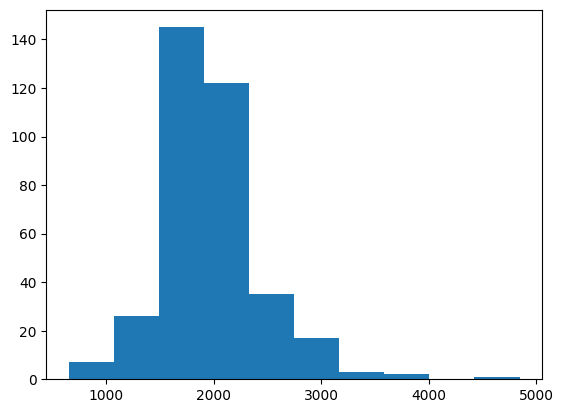

count    159.000000
mean       1.584906
std        0.658939
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: bedrooms, dtype: float64


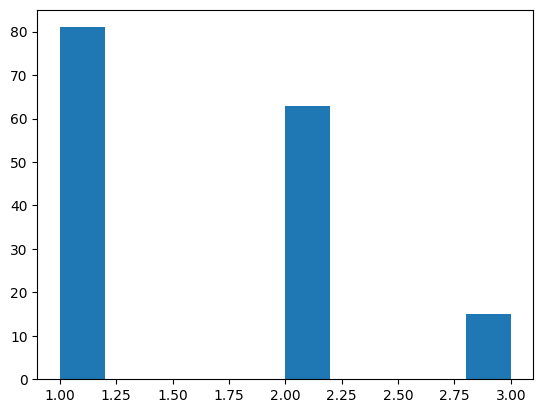

In [23]:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()
print(df['bedrooms'].describe())
df['bedrooms'].hist(grid=False)
plt.show()

In [24]:
# Price by the number of bedrooms:
df.loc[:,['price','bedrooms']].groupby('bedrooms').describe()

price                                                           \
         count         mean         std     min     25%     50%     75%   
bedrooms                                                                  
1.0       81.0  1880.901235  295.478113   650.0  1699.0  1840.0  2115.0   
2.0       63.0  2111.492063  419.549831  1470.0  1815.5  2144.0  2429.5   
3.0       15.0  2476.400000  473.905174  1700.0  2253.5  2450.0  2807.5   

                  
             max  
bedrooms          
1.0       2463.0  
2.0       2851.0  
3.0       3400.0

In [36]:
# Price by furnished:
df.loc[:,['price','furnished']].groupby('furnished').describe()

price                                                           \
           count         mean         std     min     25%     50%     75%   
furnished                                                                   
furnished    1.0  1650.000000         NaN  1650.0  1650.0  1650.0  1650.0   
missing    357.0  1976.397759  463.620363   650.0  1699.0  1915.0  2190.0   

                   
              max  
furnished          
furnished  1650.0  
missing    4845.0

In [54]:
# Price by the area:
df.loc[:,['price','area']].groupby('area').describe()

price                                                             \
             count         mean          std     min      25%     50%     75%   
area                                                                            
alexandria    14.0  2048.928571   341.588025  1500.0  1875.00  1958.5  2255.0   
arlington      5.0  2785.600000   748.990521  2100.0  2278.00  2350.0  3600.0   
ashburn        3.0  2111.666667   307.096619  1880.0  1937.50  1995.0  2227.5   
centerville    2.0  1700.000000     0.000000  1700.0  1700.00  1700.0  1700.0   
fairfax        3.0  1621.000000   729.193390  1200.0  1200.00  1200.0  1831.5   
herndon        3.0  1366.666667   325.320355  1050.0  1200.00  1350.0  1525.0   
manassas       3.0  2133.333333  1107.173579  1350.0  1500.00  1650.0  2525.0   
missing      316.0  1976.971519   439.829248   650.0  1725.75  1925.0  2185.0   
tysons         3.0  1630.000000   961.405222   700.0  1135.00  1570.0  2095.0   
woodbridge     6.0  1650.000000    91.934759  1470.0  1650.25  1699.0  1699.0   

                     
                max  
area                 
alexandria   2613.0  
arlington    3600.0  
ashburn      2460.0  
centerville  1700.0  
fairfax      2463.0  
herndon      1700.0  
manassas     3400.0  
missing      4845.0  
tysons       2620.0  
woodbridge   1699.0

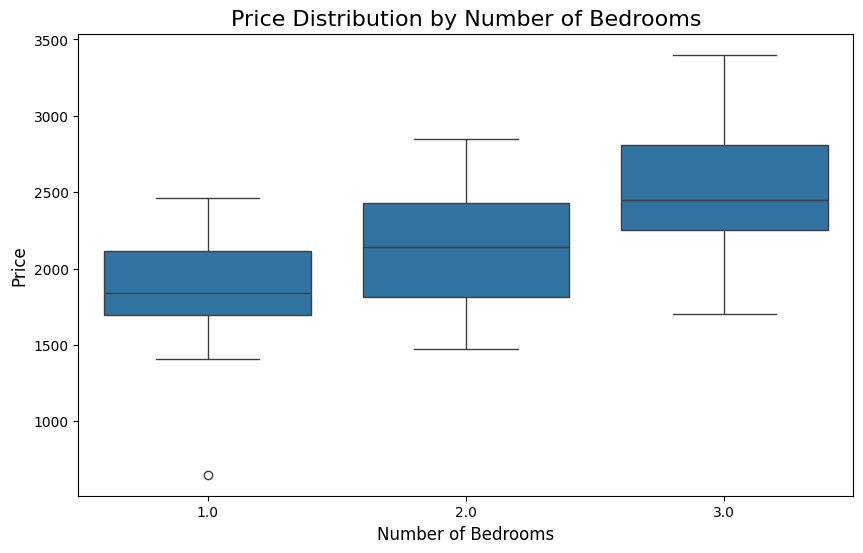

In [38]:
# Boxplot for price distribution by number of bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='bedrooms', y='price')
plt.title('Price Distribution by Number of Bedrooms', fontsize=16)
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

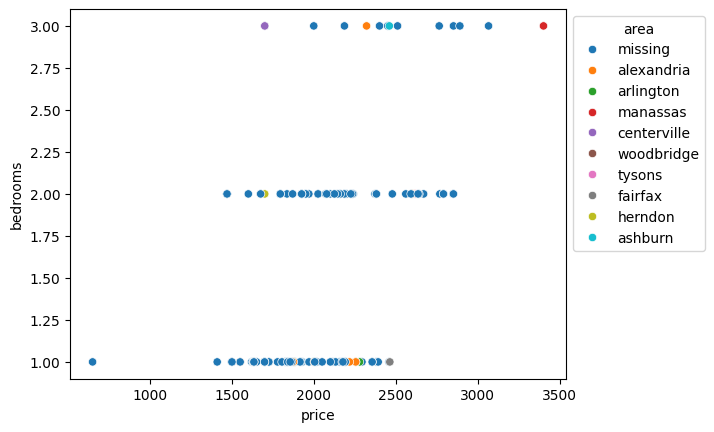

In [29]:
ax = sns.scatterplot(data=df, x='price', y='bedrooms',hue='area')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

              log_price  log_bedrooms
log_price      0.055245      0.032338
log_bedrooms   0.032338      0.162151
              log_price  log_bedrooms
log_price      1.000000      0.385398
log_bedrooms   0.385398      1.000000


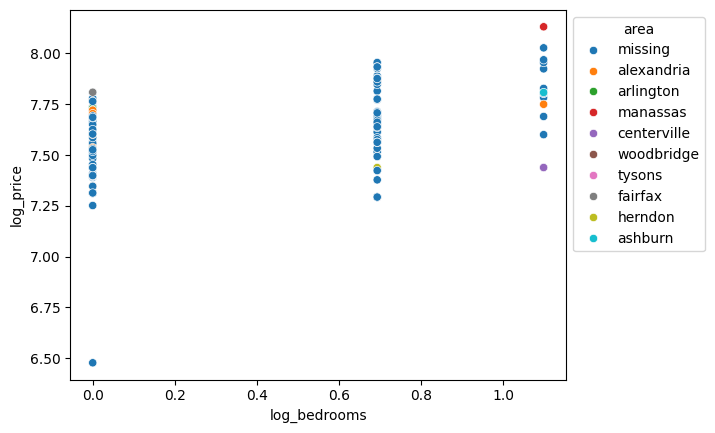

In [31]:
df['log_price'] = np.log(df['price'])
df['log_bedrooms'] = np.log(df['bedrooms'])

ax = sns.scatterplot(data=df, x='log_bedrooms', y='log_price',hue='area')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

print(df.loc[:,['log_price','log_bedrooms']].cov())
print(df.loc[:,['log_price','log_bedrooms']].corr())

In [37]:
df.head()

,title,price,bedrooms,link,area,furnished,log_price,log_bedrooms
0,"public parks nearby, conference room, dishwasher",1992,NaN,https://washingtondc.craigslist.org/nva/apa/d/...,missing,missing,7.596894,NaN
1,"vinyl flooring, pet friendly, granite countertops",2126,NaN,https://washingtondc.craigslist.org/nva/apa/d/...,missing,missing,7.661998,NaN
2,"all-electric kitchen, washer and dryer in home...",2115,1.0,https://washingtondc.craigslist.org/nva/apa/d/...,missing,missing,7.656810,0.000000
3,"studio/1b, stainless steel appliances, located...",1550,1.0,https://washingtondc.craigslist.org/nva/apa/d/...,alexandria,missing,7.346010,0.000000
4,"2/bd 1/ba, refrigerator, high-speed internet a...",1836,2.0,https://washingtondc.craigslist.org/nva/apa/d/...,missing,missing,7.515345,0.693147


In [44]:
import time
import random
import requests
from bs4 import BeautifulSoup
import numpy as np

links = df['link']
data = []

for i, link in enumerate(links):
    if i >= 10:  # Stop after 10 records since takes too long otherwise
        break
    
    time.sleep(random.randint(1, 3))

    try:
        raw = requests.get(link, headers=header, timeout=5)  # Get the page
        bsObj = BeautifulSoup(raw.content, 'html.parser')  # Parse the HTML

        # Latitude and Longitude
        latitude = bsObj.find('div', id='map').get('data-latitude', np.nan) if bsObj.find('div', id='map') else np.nan
        longitude = bsObj.find('div', id='map').get('data-longitude', np.nan) if bsObj.find('div', id='map') else np.nan

        # Address
        address = bsObj.find('div', class_='mapaddress').get_text(strip=True) if bsObj.find('div', class_='mapaddress') else 'missing'

        # Rent Period
        rent_period = bsObj.find('div', class_='attr rent_period').find(class_='valu').get_text(strip=True) if bsObj.find('div', class_='attr rent_period') else 'missing'

        # Pets Allowed (Cats, Dogs)
        pets_cat = bsObj.find('div', class_='attr pets_cat').find(class_='valu').get_text(strip=True) if bsObj.find('div', class_='attr pets_cat') else 'missing'
        pets_dog = bsObj.find('div', class_='attr pets_dog').find(class_='valu').get_text(strip=True) if bsObj.find('div', class_='attr pets_dog') else 'missing'

        # Laundry, Parking, Smoking, Air Conditioning
        laundry = bsObj.find('div', class_='attr').find('span', class_='valu').get_text(strip=True) if bsObj.find('div', class_='attr') else 'missing'
        parking = bsObj.find('div', class_='attr').find('span', class_='valu').get_text(strip=True) if bsObj.find('div', class_='attr') else 'missing'
        smoking = bsObj.find('div', class_='attr no_smoking').find('span', class_='valu').get_text(strip=True) if bsObj.find('div', class_='attr no_smoking') else 'missing'
        air_conditioning = bsObj.find('div', class_='attr airconditioning').find('span', class_='valu').get_text(strip=True) if bsObj.find('div', class_='attr airconditioning') else 'missing'

        # Add the collected data to the list
        record = {
            'link': link,
            'latitude': latitude,
            'longitude': longitude,
            'address': address,
            'rent_period': rent_period,
            'pets_cat': pets_cat,
            'pets_dog': pets_dog,
            'laundry': laundry,
            'parking': parking,
            'no_smoking': smoking,
            'air_conditioning': air_conditioning,
        }
        data.append(record)

    except Exception as e:
        print(f"Error while processing {link}: {e}")
        continue


In [45]:
new_df = pd.DataFrame.from_dict(data)
new_df.head()

,link,latitude,longitude,address,rent_period,pets_cat,pets_dog,laundry,parking,no_smoking,air_conditioning
0,https://washingtondc.craigslist.org/nva/apa/d/...,38.792582,-77.138365,5901 Coverdale Way,monthly,cats are OK - purrr,dogs are OK - wooof,monthly,monthly,missing,air conditioning
1,https://washingtondc.craigslist.org/nva/apa/d/...,38.818213,-77.147651,4905 Southland Ave,monthly,cats are OK - purrr,dogs are OK - wooof,monthly,monthly,no smoking,air conditioning
2,https://washingtondc.craigslist.org/nva/apa/d/...,39.053857,-77.436805,20300 River Ridge Terrace,monthly,cats are OK - purrr,dogs are OK - wooof,monthly,monthly,missing,air conditioning
3,https://washingtondc.craigslist.org/nva/apa/d/...,38.791200,-77.081400,6034 Richmond Highway,monthly,cats are OK - purrr,dogs are OK - wooof,monthly,monthly,no smoking,air conditioning
4,https://washingtondc.craigslist.org/nva/apa/d/...,38.814900,-77.121000,4820 Kenmore Avenue,monthly,cats are OK - purrr,dogs are OK - wooof,monthly,monthly,missing,air conditioning


In [46]:
new_df.shape

(10, 11)

In [47]:
df = pd.concat([df,new_df],axis=1) # combine data frames
df.head()

,title,price,bedrooms,link,area,furnished,log_price,log_bedrooms,link,latitude,longitude,address,rent_period,pets_cat,pets_dog,laundry,parking,no_smoking,air_conditioning
0,"public parks nearby, conference room, dishwasher",1992,NaN,https://washingtondc.craigslist.org/nva/apa/d/...,missing,missing,7.596894,NaN,https://washingtondc.craigslist.org/nva/apa/d/...,38.792582,-77.138365,5901 Coverdale Way,monthly,cats are OK - purrr,dogs are OK - wooof,monthly,monthly,missing,air conditioning
1,"vinyl flooring, pet friendly, granite countertops",2126,NaN,https://washingtondc.craigslist.org/nva/apa/d/...,missing,missing,7.661998,NaN,https://washingtondc.craigslist.org/nva/apa/d/...,38.818213,-77.147651,4905 Southland Ave,monthly,cats are OK - purrr,dogs are OK - wooof,monthly,monthly,no smoking,air conditioning
2,"all-electric kitchen, washer and dryer in home...",2115,1.0,https://washingtondc.craigslist.org/nva/apa/d/...,missing,missing,7.656810,0.000000,https://washingtondc.craigslist.org/nva/apa/d/...,39.053857,-77.436805,20300 River Ridge Terrace,monthly,cats are OK - purrr,dogs are OK - wooof,monthly,monthly,missing,air conditioning
3,"studio/1b, stainless steel appliances, located...",1550,1.0,https://washingtondc.craigslist.org/nva/apa/d/...,alexandria,missing,7.346010,0.000000,https://washingtondc.craigslist.org/nva/apa/d/...,38.791200,-77.081400,6034 Richmond Highway,monthly,cats are OK - purrr,dogs are OK - wooof,monthly,monthly,no smoking,air conditioning
4,"2/bd 1/ba, refrigerator, high-speed internet a...",1836,2.0,https://washingtondc.craigslist.org/nva/apa/d/...,missing,missing,7.515345,0.693147,https://washingtondc.craigslist.org/nva/apa/d/...,38.814900,-77.121000,4820 Kenmore Avenue,monthly,cats are OK - purrr,dogs are OK - wooof,monthly,monthly,missing,air conditioning


In [48]:
df.dtypes

title                object
price                 int64
bedrooms            float64
link                 object
area                 object
furnished            object
log_price           float64
log_bedrooms        float64
link                 object
latitude             object
longitude            object
address              object
rent_period          object
pets_cat             object
pets_dog             object
laundry              object
parking              object
no_smoking           object
air_conditioning     object
dtype: object

In [51]:
df['latitude'] = df['latitude'].str.replace(',', '')
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')

df['longitude'] = df['longitude'].str.replace(',', '')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')


df.to_csv('craiglist_cville_housing_long.csv')

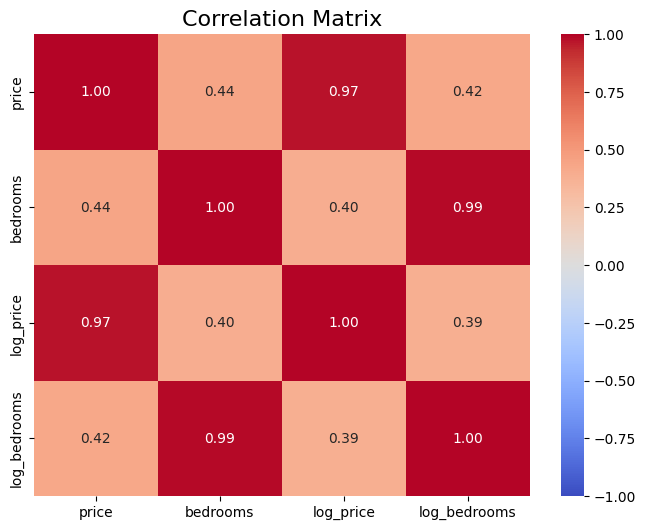

In [53]:
# Correlation heatmap for numeric columns
corr_matrix = df[['price', 'bedrooms', 'log_price', 'log_bedrooms']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize=16)
plt.show()
